In [99]:
import numpy as np 
import pandas as pd # to read csv files 
import seaborn as sns

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

Objective:

1-What is the average departure delay for flights in the dataset? 

2-Which airline has the most number of flights in the dataset? barchart 

4-What is the correlation between the temperature and the number of flight delays? scatter 

6-Which day of the week has the highest number of flight delays?

Linear regression questions

2-Can we predict the departure delay based on the wind speed, humidity, and pressure?

4-Can we predict the taxi-out time based on the day of the week, the destination, and the weather conditions?

5-How does the arrival delay vary with the departure delay?

6-Can we predict the distance traveled based on the elapsed time and the temperature?

7-How does the wind speed impact the fuel consumption and the cost of the flight?

In [100]:
data = pd.read_csv('M1_final.csv')
data.head()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0     11             1            5                B6   N828JB  CHS   
1     11             1            5                B6   N992JB  LAX   
2     11             1            5                B6   N959JB  FLL   
3     11             1            5                B6   N999JQ  MCO   
4     11             1            5                DL   N880DN  ATL   

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  Humidity  \
0         -1               124       636        324  ...         34        58   
1         -7               371      2475        340  ...         34        58   
2         40               181      1069        301  ...         34        58   
3         -2               168       944        345  ...         34        58   
4         -4               139       760        360  ...         32        58   

   Wind Wind Speed  Wind Gust Pressure     Condition  sch_dep  sch_arr  \
0     W         25         38    29.86  Fair / Windy        9       17   
1     W         25         38    29.86  Fair / Windy        9       17   
2     W         25         38    29.86  Fair / Windy        9       17   
3     W         25         38    29.86  Fair / Windy        9       17   
4     W         24         35    29.91  Fair / Windy        9       17   

  TAXI_OUT  
0       14  
1       15  
2       22  
3       12  
4       13  

[5 rows x 23 columns]

In [101]:
print(data.shape)

(28820, 23)


In [102]:
data.nunique() #different values 

MONTH                   3
DAY_OF_MONTH           31
DAY_OF_WEEK             7
OP_UNIQUE_CARRIER       9
TAIL_NUM             2092
DEST                   65
DEP_DELAY             342
CRS_ELAPSED_TIME      327
DISTANCE               64
CRS_DEP_M             606
DEP_TIME_M           1240
CRS_ARR_M             970
Temperature            51
Dew Point              64
Humidity               78
Wind                   18
Wind Speed             30
Wind Gust              28
Pressure              149
Condition              25
sch_dep                56
sch_arr                47
TAXI_OUT               37
dtype: int64

In [103]:
#cleaning data 
data.isnull().sum() 

#so in wind we have 2 missing values 

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [104]:
data['Wind'].fillna(method='ffill', inplace=True) #FILL MISSING DATA

In [105]:
data.isnull().sum() #CLEANED

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [106]:
data.describe()

MONTH  DAY_OF_MONTH   DAY_OF_WEEK     DEP_DELAY  \
count  28820.000000  28820.000000  28820.000000  28820.000000   
mean       7.894240     16.021096      4.008952      6.374983   
std        4.991723      8.750179      1.985230     38.735144   
min        1.000000      1.000000      1.000000    -22.000000   
25%        1.000000      8.000000      2.000000     -6.000000   
50%       11.000000     16.000000      4.000000     -3.000000   
75%       12.000000     24.000000      6.000000      2.000000   
max       12.000000     31.000000      7.000000   1276.000000   

       CRS_ELAPSED_TIME      DISTANCE     CRS_DEP_M    DEP_TIME_M  \
count      28820.000000  28820.000000  28820.000000  28820.000000   
mean         225.288203   1267.746079    831.003851    828.934698   
std          119.482417    889.343246    299.398525    305.864103   
min           57.000000     94.000000    301.000000      1.000000   
25%          124.000000    483.000000    545.000000    542.000000   
50%          188.000000   1029.000000    856.000000    854.000000   
75%          365.000000   2248.000000   1095.000000   1097.000000   
max          697.000000   4983.000000   1439.000000   1440.000000   

          CRS_ARR_M   Temperature      Humidity    Wind Speed     Wind Gust  \
count  28820.000000  28820.000000  28820.000000  28820.000000  28820.000000   
mean     910.874289     41.489833     57.732616     12.367627      5.535323   
std      345.411743      8.043533     23.468676      6.259298     11.886457   
min        1.000000     17.000000      0.000000      0.000000      0.000000   
25%      667.000000     36.000000     46.000000      8.000000      0.000000   
50%      918.000000     42.000000     59.000000     12.000000      0.000000   
75%     1193.000000     47.000000     74.000000     16.000000      0.000000   
max     1439.000000     68.000000     97.000000     36.000000     49.000000   

           Pressure       sch_dep       sch_arr      TAXI_OUT  
count  28820.000000  28820.000000  28820.000000  28820.000000  
mean      30.092433     31.091256     28.432130     20.858570  
std        0.296160      9.510359      8.263043      6.851915  
min       29.200000      0.000000      0.000000      5.000000  
25%       29.880000     26.000000     21.000000     16.000000  
50%       30.110000     30.000000     30.000000     19.000000  
75%       30.320000     37.000000     35.000000     25.000000  
max       30.750000     55.000000     46.000000     41.000000

In [107]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')

# Compute correlation
correlation = numeric_data.corr()


<Axes: >

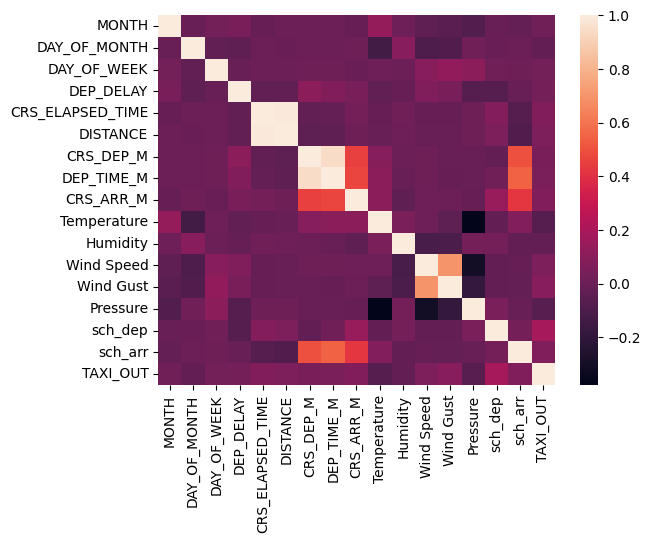

In [108]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns
            ,annot=False)



what does this heatmap show? 

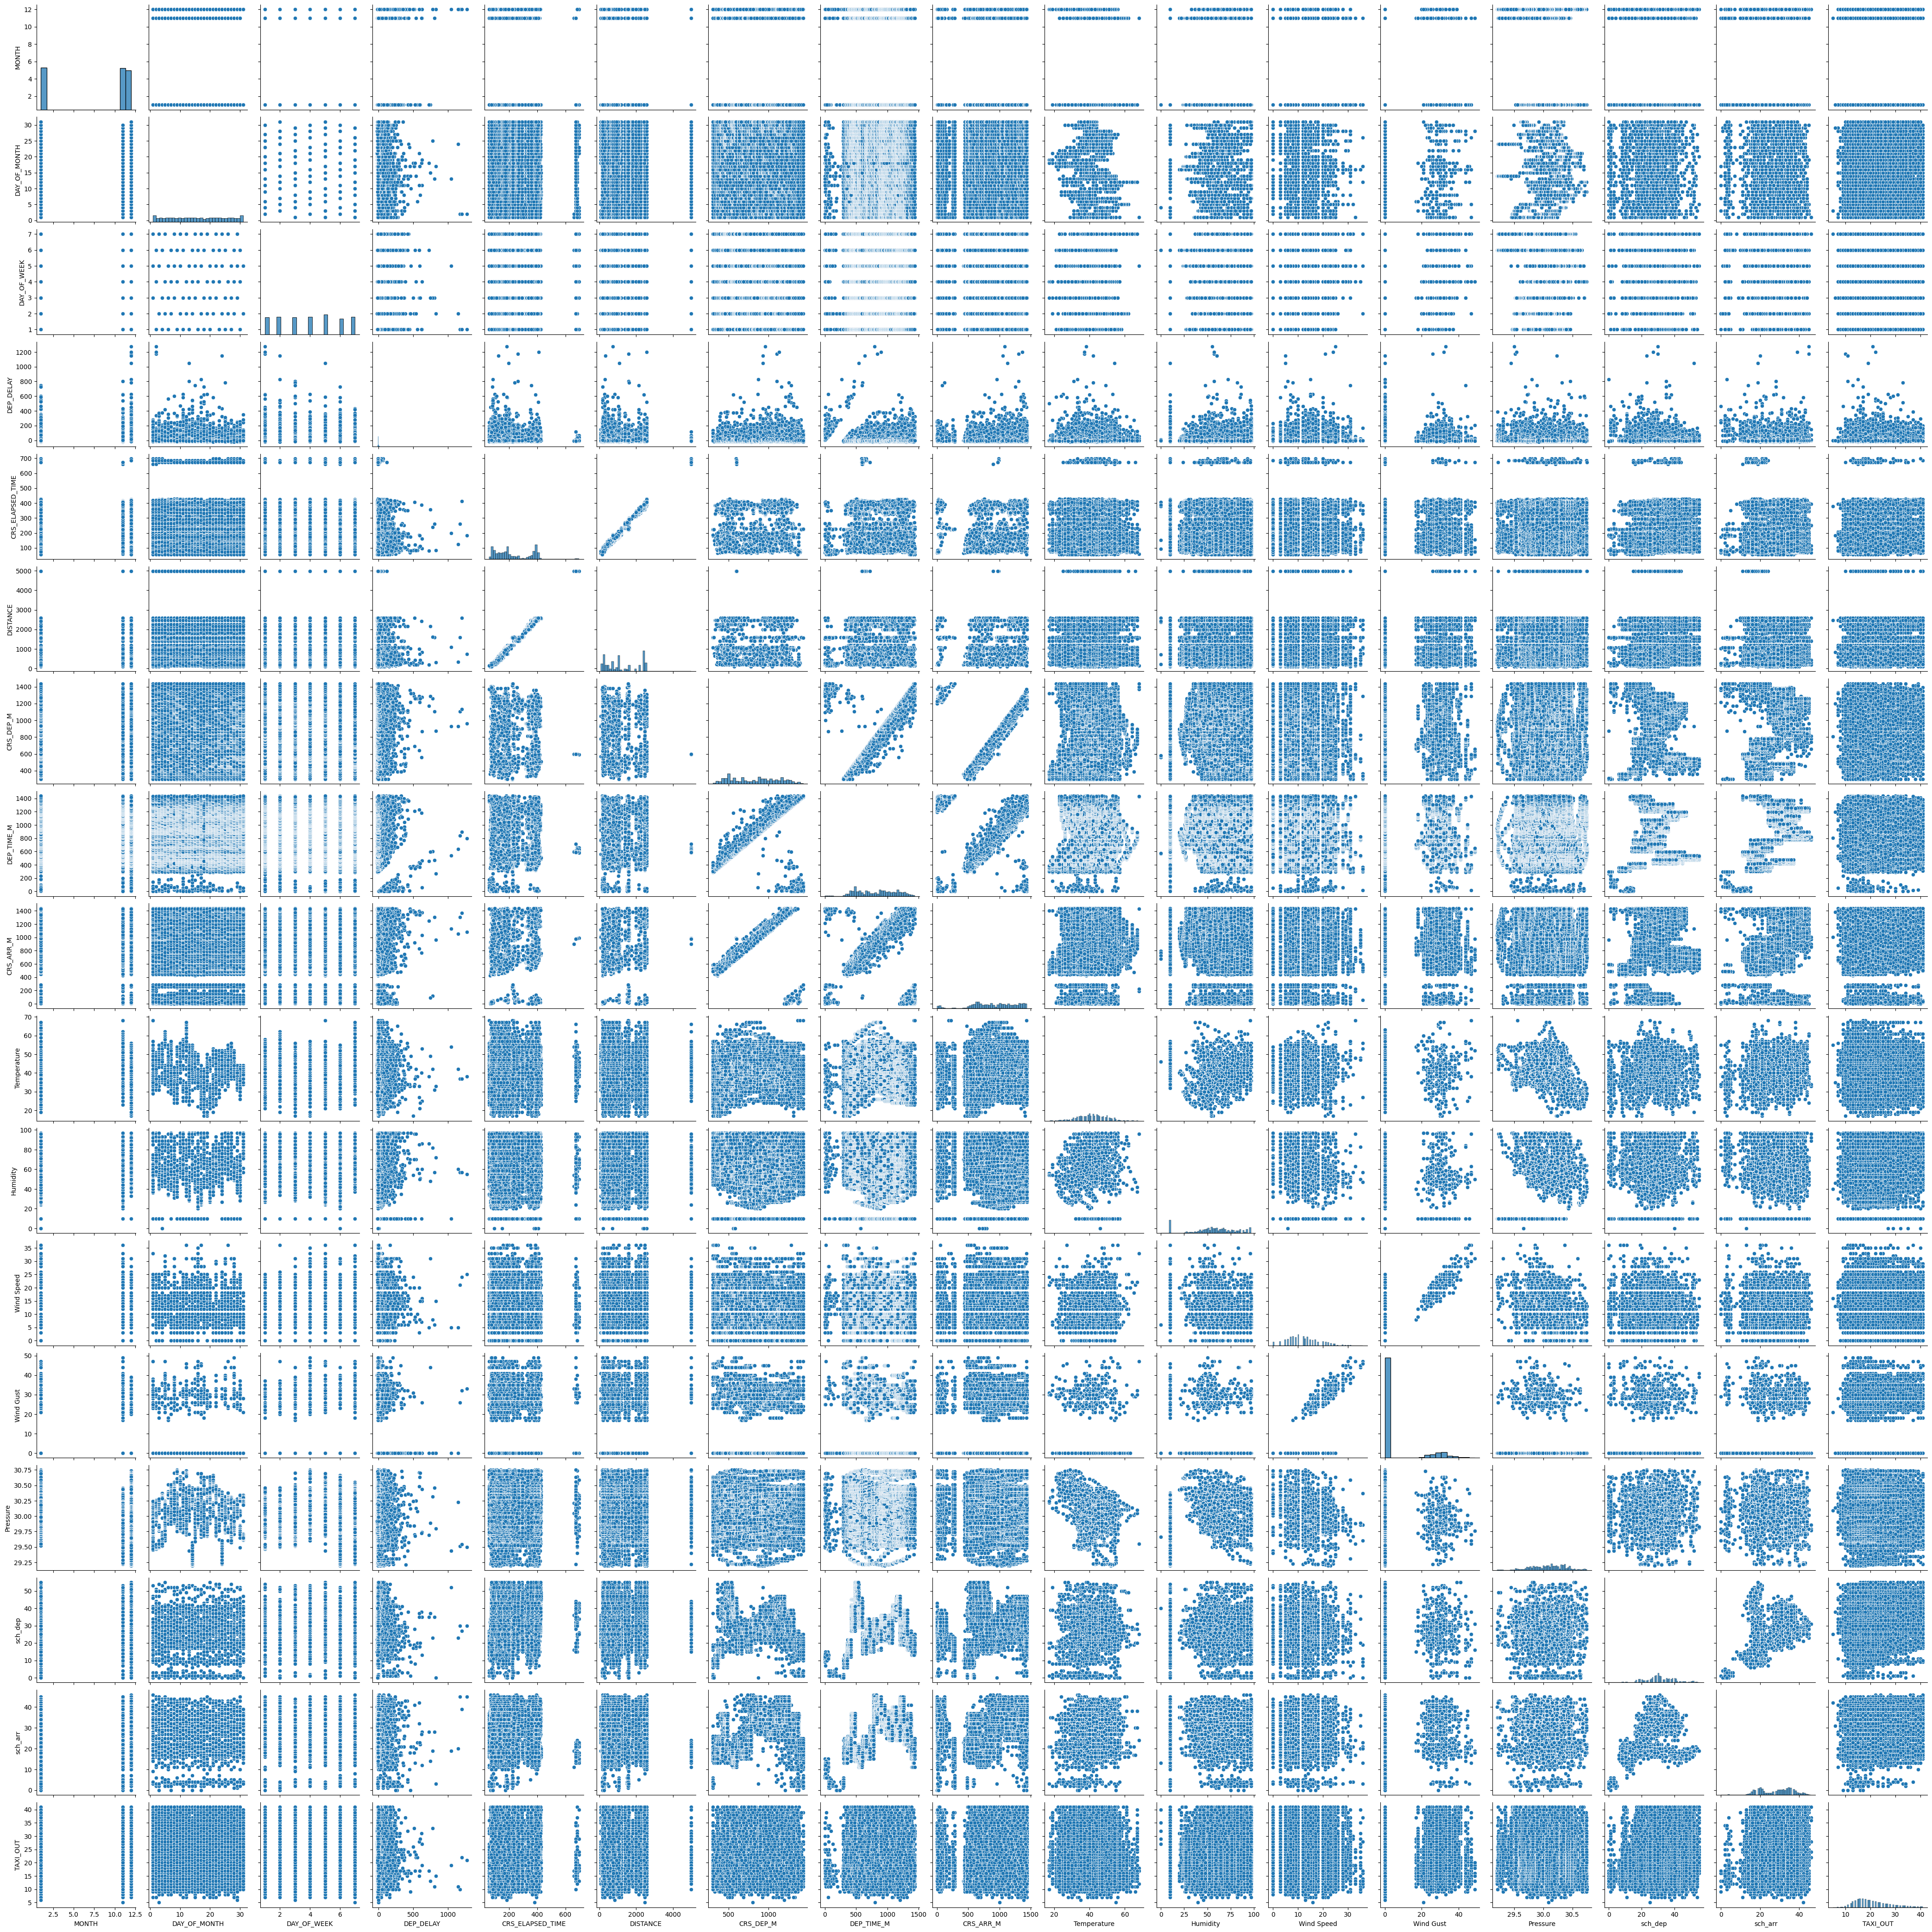

In [109]:
sns.pairplot(data)  # a lot of data deffo need to split it 

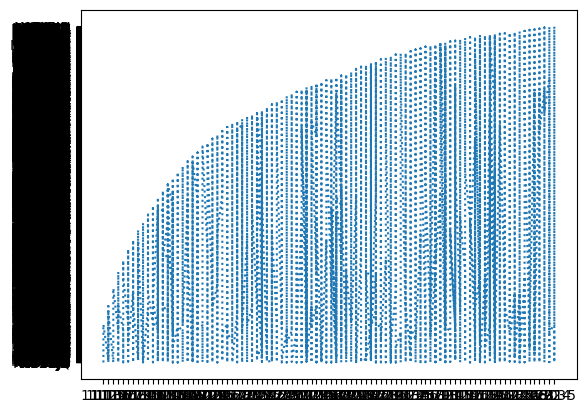

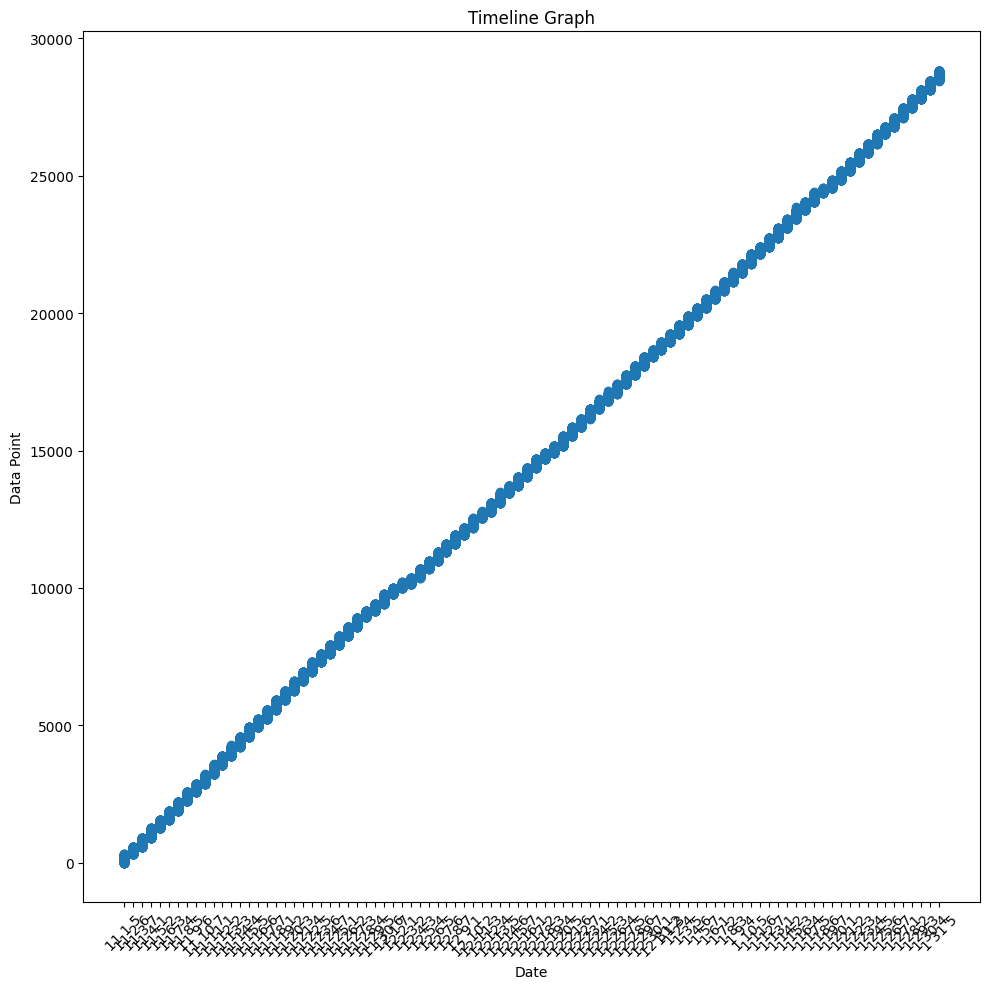

In [110]:
data = pd.read_csv('M1_final.csv')

data['date'] = data.apply(lambda x: f"{x['MONTH']} {x['DAY_OF_MONTH']} {x['DAY_OF_WEEK']}", axis=1)


# Create the plot
plt.plot(data['date'], data['TAIL_NUM'], linestyle = 'dotted')


# Step 3: Plotting# Add title and axis labels
plt.figure(figsize=(10, 10))
plt.plot(data['date'], range(len(data)), marker='o')
plt.xlabel('Date')
plt.ylabel('Data Point')
plt.title('Timeline Graph')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display the plot
plt.show()

Text(0, 0.5, 'Number of Flights')

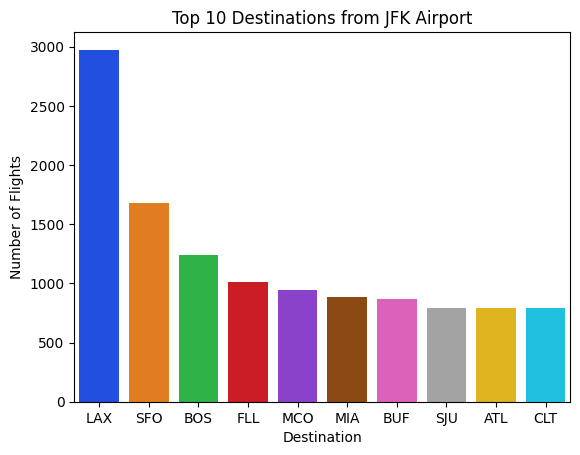

In [111]:
# Get the frequency of each destination
dest_counts = data["DEST"].value_counts()

# Plot the top 10 destinations
sns.countplot(x='DEST', data=data, order=dest_counts.iloc[:10].index, palette='bright')
plt.title('Top 10 Destinations from JFK Airport', loc="center")
plt.xlabel('Destination')
plt.ylabel('Number of Flights')

Which airline has the most number of flights in the dataset?
Los angeles, San Francisco followed by Boston.

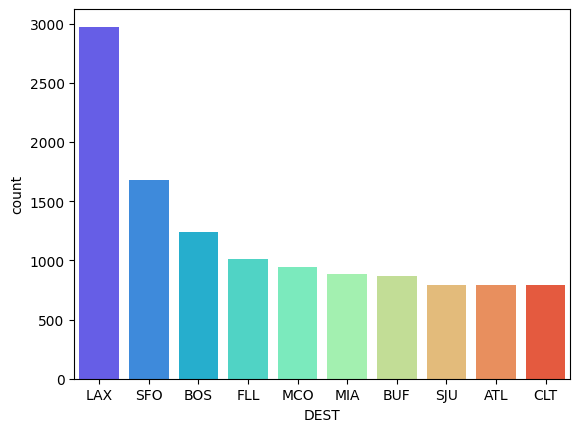

In [112]:
sns.countplot(x='DEST', data=data, order=data['DEST'].value_counts().iloc[:10].index, palette ='rainbow')
#this gave me a warning "Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect."

#sns.countplot(x='DEST', hue='DEST', data=data, order=data['DEST'].value_counts().iloc[:10].index, palette ='rainbow', legend=False)
#warnings still appear 
import warnings
warnings.filterwarnings("ignore")


In [113]:
print(data["TAXI_OUT"].describe()) 

count    28820.000000
mean        20.858570
std          6.851915
min          5.000000
25%         16.000000
50%         19.000000
75%         25.000000
max         41.000000
Name: TAXI_OUT, dtype: float64


Text(0.5, 0, 'Minutes')

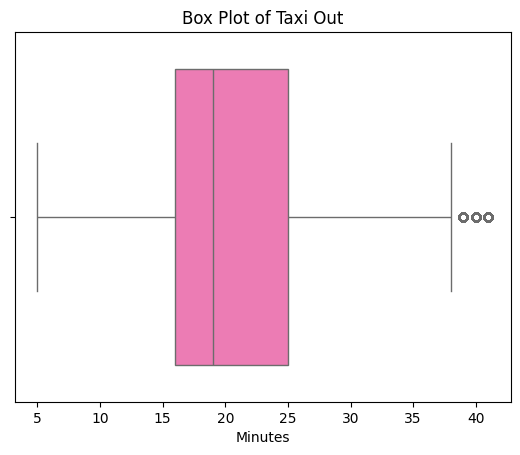

In [114]:
sns.boxplot(x=data["TAXI_OUT"], color = 'hotpink')
plt.title('Box Plot of Taxi Out', loc="center")
plt.gca().set_facecolor('none') 
plt.xlabel('Minutes') 

so what is this result saying?
The average taxi-out time for flights is 20minutes. 75% of the flights have a delay less than 25 minutes.

what does taxi out mean?
Taxi-out time is defined as the time spent by a flight between its actual off-block time (AOBT) and actual take-off time (ATOT). 

Off-block time is when the aircraft starts moving from the gate, while takeoff time is when the aircraft actually leaves the ground.

does it answer "What is the average taxi-out time for flights in the dataset?"


#REGRESSION


7-How does the wind speed impact the fuel consumption and the cost of the flight?

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

data.drop(columns=['Wind'], inplace=True)
data.head()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0     11             1            5                B6   N828JB  CHS   
1     11             1            5                B6   N992JB  LAX   
2     11             1            5                B6   N959JB  FLL   
3     11             1            5                B6   N999JQ  MCO   
4     11             1            5                DL   N880DN  ATL   

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  Humidity  \
0         -1               124       636        324  ...         34        58   
1         -7               371      2475        340  ...         34        58   
2         40               181      1069        301  ...         34        58   
3         -2               168       944        345  ...         34        58   
4         -4               139       760        360  ...         32        58   

   Wind Speed Wind Gust  Pressure     Condition  sch_dep  sch_arr TAXI_OUT  \
0          25        38     29.86  Fair / Windy        9       17       14   
1          25        38     29.86  Fair / Windy        9       17       15   
2          25        38     29.86  Fair / Windy        9       17       22   
3          25        38     29.86  Fair / Windy        9       17       12   
4          24        35     29.91  Fair / Windy        9       17       13   

     date  
0  11 1 5  
1  11 1 5  
2  11 1 5  
3  11 1 5  
4  11 1 5  

[5 rows x 23 columns]

In [116]:
## select the independent and dependent variable
# Can we predict the departure delay based on the wind speed, humidity, and pressure?
data.index = data.iloc[:,0]
data_to_use = data.iloc[:,14:17]
data_to_target = data.iloc[:,17]

In [117]:
features = ['Wind Speed', 'Humidity', 'Pressure']
target = 'DEP_DELAY'
X = data[features]
y = data[target]


In [118]:
## data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)
result_log = {'Actual': y_test, 'Predicted': y_pred}
output = pd.DataFrame(result_log)
output

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 16.525073922820976
Mean Squared Error: 1452.02902452817
R-squared: 0.004002263331092326


In [120]:
## create our naive bayes
gaussian_model = GaussianNB()

## train my model
gaussian_model.fit(X_train, y_train)

GaussianNB()

In [123]:
## make prediction
prediction = gaussian_model.predict(X_test)
